**_Importing all necessary libraries & the churn.csv file_**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df_churn = pd.read_csv("Sample_Files/churn.csv")

**_First Insight (Part 1): Correlation heatmap_**

- Color Coding: The colors represent the correlation coefficient values. Warm colors (like red) represent positive correlation, and cool colors (like blue) represent negative correlation. Lighter shades indicate a weaker correlation, while darker shades indicate stronger correlation.

- Correlation Coefficient: This is a numerical measure that quantifies the degree of linear relationship between two variables. It ranges from -1 to 1. A value close to 1 implies a strong positive correlation (as one variable increases, the other also increases), a value close to -1 implies a strong negative correlation (as one variable increases, the other decreases), and a value around 0 implies no linear correlation.

In our heatmap:

- SeniorCitizen and tenure have a correlation coefficient of 0.017, which is very close to 0, indicating almost no linear relationship.

- SeniorCitizen and MonthlyCharges show a coefficient of 0.22, suggesting a weak positive correlation.

- SeniorCitizen and TotalCharges have a coefficient of 0.1, indicating a very weak positive correlation.

- tenure and MonthlyCharges have a coefficient of 0.25, indicating a weak positive correlation.

- tenure and TotalCharges have a high coefficient of 0.83, indicating a strong positive correlation. As the tenure increases (the duration for which a customer has been with the company), the total amount charged to the customer also tends to increase.

- MonthlyCharges and TotalCharges have a coefficient of 0.65, indicating a moderate to strong positive correlation.

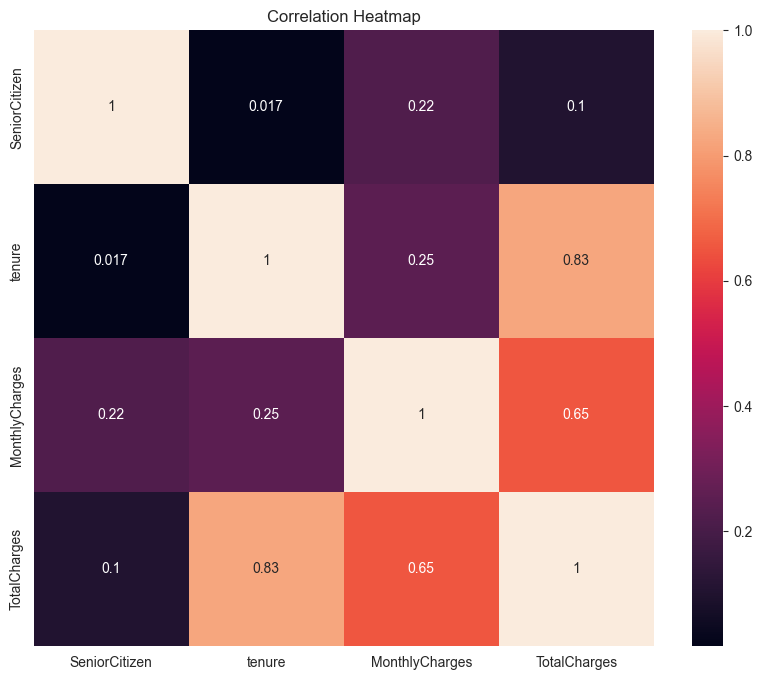

In [3]:
# Converting 'TotalCharges' to numeric, errors='coerce' will replace non-numeric values with NaN
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')

# Selecting only numerical columns
numerical_data = df_churn[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']]

# Calculating the correlation heatmap
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
plt.title('Correlation Heatmap')
sns.heatmap(correlation_matrix, annot=True)
plt.show()

**_First Insight (Part 2): Tenure by log(Total Charges)_**

As the relationship between tenure and total charges is non-linear, and total charges span several orders of magnitude, we decided that applying log transformation could be beneficial. Log transformation can help to:

- Stabilize the variance across the data.

- Make the data conform more closely to the normal distribution.

- Reduce the effect of outliers, as it compresses the scale of the higher values.

- Interpretability.



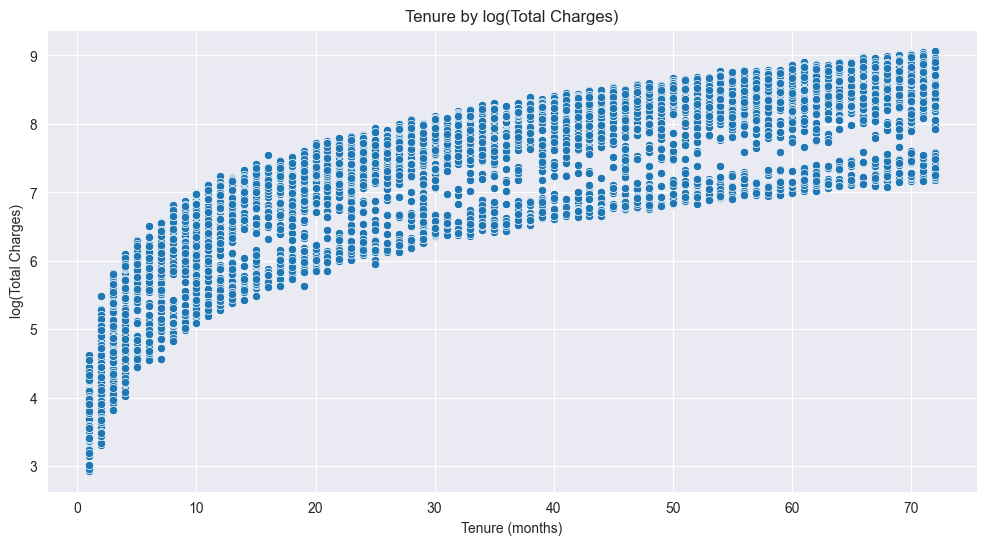

In [4]:
df_churn['log(Total_Charges)'] = np.log(df_churn['TotalCharges'])

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_churn, x='tenure', y='log(Total_Charges)')
plt.title('Tenure by log(Total Charges)')
plt.xlabel('Tenure (months)')
plt.ylabel('log(Total Charges)')
plt.show()

**_Second Insight: Tenure Distribution for Churned and Retained Customers_**

We decided that the type of plot in this case should be a Kernel Density Estimate (KDE) plot, which is a way to estimate the probability density function of a continuous random variable. In this context, the graph is showing the distribution of tenure (in months) among two groups of customers: those who have churned (stopped using the company's services) and those who have been retained (continued using the services).

- The x-axis represents tenure, measured in months. This shows how long customers have been with the company.

- The y-axis represents density, which can be thought of as the probability of customers falling within a particular tenure range.

- The red area represents churned customers. The peak in the blue area indicates that a high density of churned customers have a tenure of a few months. It sharply decreases as tenure increases, suggesting that fewer customers churn as they stay longer with the company.

- The green area represents retained customers. The distribution is broader, with a gentle slope, indicating that retained customers are spread out across various tenures. There's also a secondary peak around 70 months, suggesting a higher density of retained customers with long tenures.

- The overlapping area where both colors blend indicates tenures where there are both churned and retained customers. The graph suggests that newer customers are more likely to churn, and customers with longer tenure are more likely to stay.

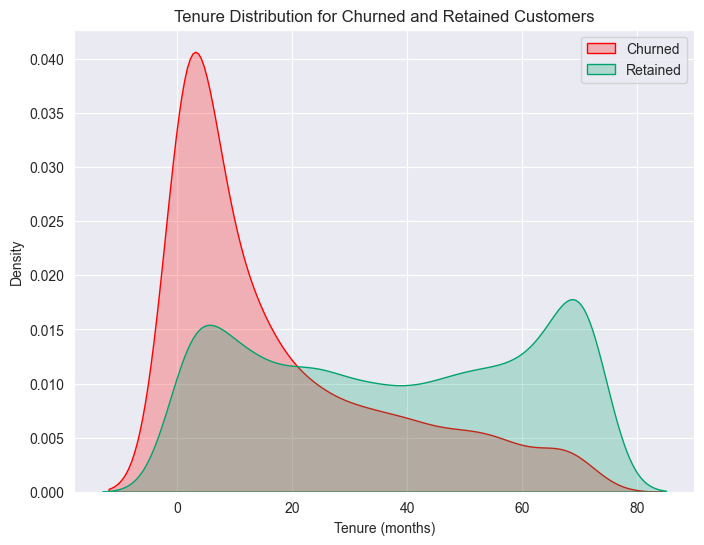

In [5]:
# Separate the dataset into churned and retained customers
churned_customers = df_churn[df_churn['Churn'] == 'Yes']
retained_customers = df_churn[df_churn['Churn'] == 'No']

# Plotting the distributions
plt.figure(figsize=(8, 6))

# KDE for churned customers
sns.kdeplot(churned_customers['tenure'], label="Churned", fill=True, color='#FF0000')

# KDE for retained customers
sns.kdeplot(retained_customers['tenure'], label="Retained", fill=True, color='#00A36C')

plt.title('Tenure Distribution for Churned and Retained Customers')
plt.xlabel('Tenure (months)')
plt.ylabel('Density')
plt.legend()
plt.show()

**_Third Insight (Part 1): Churn Rate for Gender and Senior Citizen_**

By comparing the red sections' heights across the bars, you can infer which groups have higher or lower churn rates. The graph is useful for identifying if being a senior citizen or the gender of the customer has any noticeable impact on churn rates.

The height of the red section in each bar shows the churn rate for that group. For example, if the red section takes up half of the bar, that would mean that 50% of the customers in that group have churned.

- The x-axis is divided into four groups, combining gender (Female, Male) and Senior Citizen status (0 for not a senior citizen, 1 for a senior citizen).

- The y-axis measures the proportion of churn within each group.

- There are two colors in each bar: green represents the proportion of customers who have not churned ('No'), and red represents the proportion of customers who have churned ('Yes').

Each bar represents one of the four groups:

- Female customers who are not senior citizens (Female, 0)

- Female customers who are senior citizens (Female, 1)

- Male customers who are not senior citizens (Male, 0)

- Male customers who are senior citizens (Male, 1)

<Figure size 1000x600 with 0 Axes>

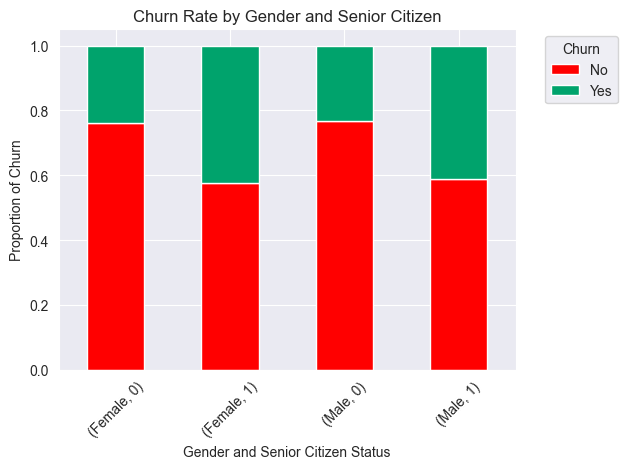

In [6]:
# First we'll group the data by 'gender' and 'SeniorCitizen' and then calculate the churn rates
gender_senior_churn = df_churn.groupby(['gender', 'SeniorCitizen'])['Churn'].value_counts(normalize=True).unstack()

# Plotting the results
plt.figure(figsize=(10, 6))

# Plot for each gender and senior citizen combination
gender_senior_churn.plot(kind='bar', stacked=True, color=['#FF0000', '#00A36C'])
plt.title('Churn Rate by Gender and Senior Citizen')
plt.ylabel('Proportion of Churn')
plt.xlabel('Gender and Senior Citizen Status')
plt.xticks(rotation=45)
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**_Third Insight (Part 2): Tenure Distribution for Senior Citizen_**

There's a large number of Non-Senior Citizens with a short tenure (0-10 months), indicated by the tall red bars at the beginning of the graph.

For Senior Citizens, the distribution seems to be flatter, with a less pronounced peak at the lower tenure values.
Both groups show a spike around the 70-month tenure, suggesting that there are quite a few long-term customers or members in both categories.
Overlap between the two distributions suggests that there are common tenure lengths shared by both Senior and Non-Senior Citizens.

- Statistical Distributions: The KDE(Kernel Density Estimation) lines help to see the probability density of the tenure. It seems that the Non-Senior Citizens have a higher probability of having a low tenure, while the distribution is more uniform for Senior Citizens, which implies variability in tenure length among them.

Overall, this graph provides a comparative view of how tenure is distributed across Senior and Non-Senior Citizens, which can be crucial for understanding customer or employee retention and turnover within the dataset's context.

- Tenure (X-axis): This axis represents the length of time (in months) that individuals have been with a company or service. The range is from 0 to over 70 months.

- Frequency (Y-axis): This axis shows how many individuals fall into each tenure category. The higher the bar, the more people with that tenure length.

- Senior Citizens (Green): The blue bars and line represent the distribution of tenure for Senior Citizens. The blue KDE line (a smooth curve) gives an estimate of the tenure distribution shape for this group.

- Non-Senior Citizens (Red): The red bars and semi-transparent overlay, along with the red KDE line, represent the Non-Senior Citizen group. The transparency allows for overlap between the two groups to be visible.

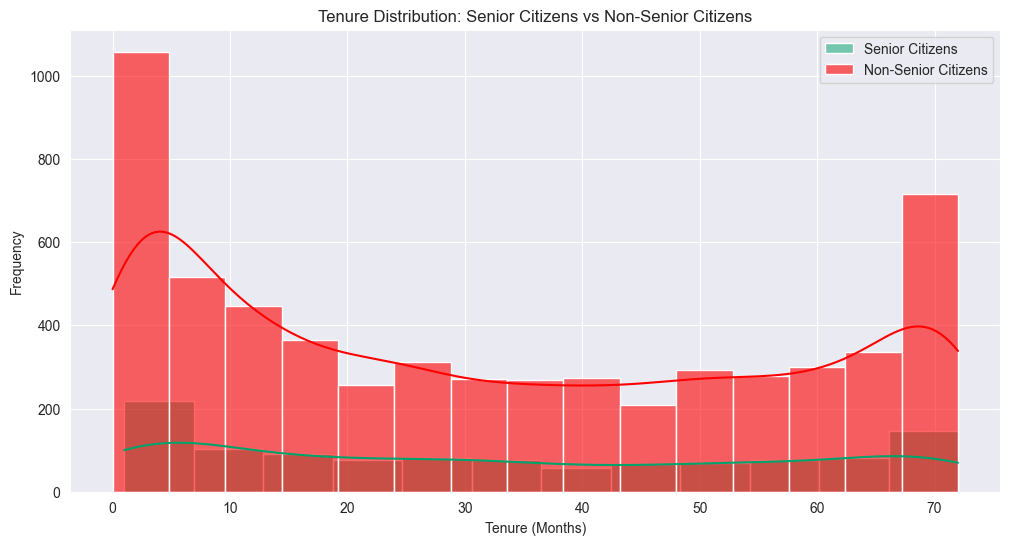

In [7]:
senior_citizens = df_churn[df_churn['SeniorCitizen'] == 1]
non_senior_citizens = df_churn[df_churn['SeniorCitizen'] == 0]

# Plotting the Tenure Distribution for Senior Citizens vs Non-Senior Citizens
plt.figure(figsize=(12, 6))
sns.histplot(senior_citizens['tenure'], color='#00A36C', label='Senior Citizens', kde=True)
sns.histplot(non_senior_citizens['tenure'], color='#FF0000', alpha=0.6, label='Non-Senior Citizens', kde=True)
plt.title('Tenure Distribution: Senior Citizens vs Non-Senior Citizens')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**_Forth Insight (Part 1): Churn Rate by Contract Type_**

This graph is a stacked bar chart that represents the churn rate by contract type. The churn rate is the rate at which customers leave a service over a given period of time. It is broken down by three types of contracts:

- Month-to-month

- One year

- Two year

For each contract type, there are two segments in each bar:

- The red segment represents the proportion of customers who did not churn ("No").

- The green segment represents the proportion of customers who did churn ("Yes").

- The y-axis shows the proportion of churn, ranging from 0.0 to 1.0, which corresponds to 0% to 100%.

Looking at the bars, we can interpret the following:

- For month-to-month contracts, the churn rate (green) is lower than the non-churn rate (red), indicating that less than half of the customers on this contract type have churned.

- For one-year contracts, the proportion of churn seems to be significantly lower than that for month-to-month contracts, as the green segment is much smaller than the red one.

- For two-year contracts, the churn rate is almost negligible as the bar is almost entirely red, indicating a very high retention rate with very few customers churning.

- The key takeaway from this chart is that customers on longer contracts (one year and especially two years) are less likely to churn compared to those on month-to-month contracts.

<Figure size 1000x600 with 0 Axes>

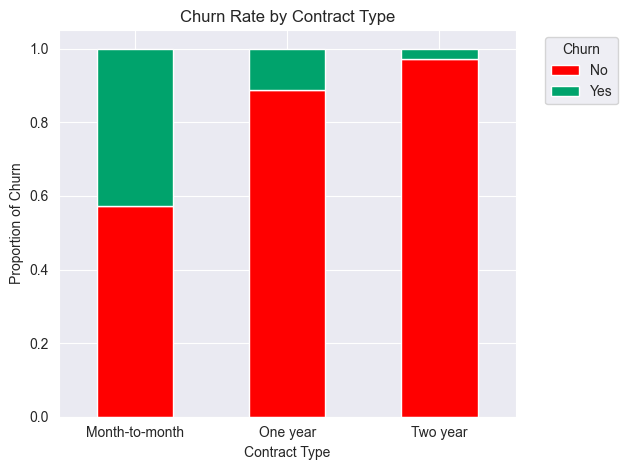

In [8]:
contract_churn = df_churn.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()

# Plotting the Churn Rate by Contract Type
plt.figure(figsize=(10, 6))
contract_churn.plot(kind='bar', stacked=True, color=['#FF0000', '#00A36C'])
plt.title('Churn Rate by Contract Type')
plt.ylabel('Proportion of Churn')
plt.xlabel('Contract Type')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**_Forth Insight (Part 2): Contract type by Senior Citizen_**

The graph suggests that Senior Citizens in this dataset prefer month-to-month contracts over longer commitments, with a noticeably lower number opting for one or two-year contracts. This could be due to various reasons such as flexibility, reluctance to long-term commitments, or other factors not discernible from the graph alone.

- The x-axis represents the types of contracts available in the dataset, which are "Month-to-month," "One year," and "Two year."

- The y-axis represents the count of Senior Citizens who have each type of contract.

- The bar for "Month-to-month" contracts is significantly taller than the other bars, indicating that this is the most common type of contract among Senior Citizens.

- "One year" contracts are the next most common, with the count being less than half of the "Month-to-month" contracts.

- "Two year" contracts are the least common among Senior Citizens, with the count being slightly less than the "One year" contracts.

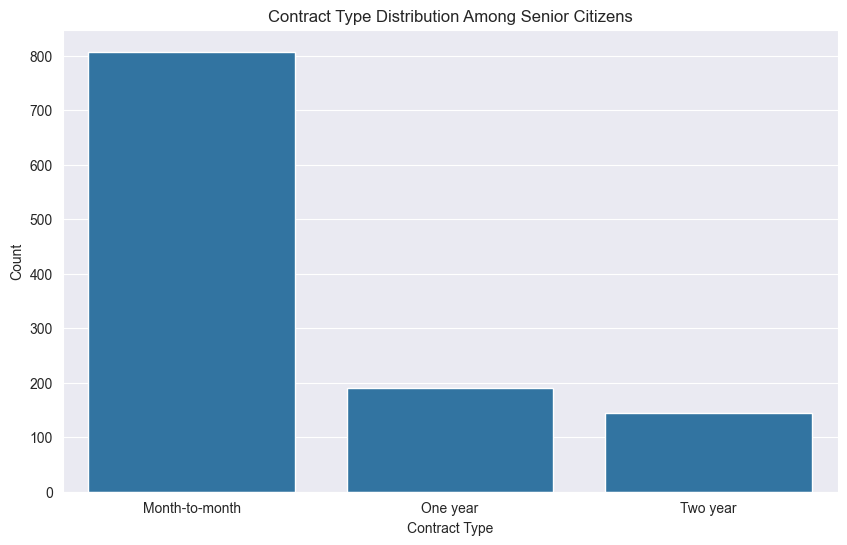

In [9]:
# Filtering the dataset for Senior Citizens
senior_citizens = df_churn[df_churn['SeniorCitizen'] == 1]

# Creating a count plot for Contract Types among Senior Citizens
plt.figure(figsize=(10, 6))
contract_type_count = sns.countplot(data=senior_citizens, x='Contract', order=senior_citizens['Contract'].value_counts().index)
plt.title('Contract Type Distribution Among Senior Citizens')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate the x labels so they don't overlap
plt.show()

**_Fifth Insight (Part 1): Churn Rate by Internet Service Type_**


The following code, shows a visualization in which we chose to analyze the retention of customers (churn) by service type. With this, we can identify which services might not be preferred by customers for any number of reasons. Giving the business information on where to direct efforts to improve. 

- Internet Service Type (X-axis): The categories shown are "DSL," "Fiber optic," and "No," which represent the types of internet service that customers have. Important to note that the "No" value means the customers does not currently have hired internet as service. 

- Churn Rate (Y-axis): This indicates the proportion of customers who have discontinued their service (churned) within each internet service type category. The churn rate is shown as a decimal, so, for example, a churn rate of 0.4 would mean 40% of customers in that category have churned.

Bars: Each bar represents the churn rate for the corresponding internet service type.

- The blue bar represents the churn rate for customers with DSL internet service.

- The green bar represents the churn rate for customers with Fiber optic service.

- The red bar represents the churn rate for customers with no internet service.

Interpreting the grapgh and insights we can gather from this:

- Customers with Fiber optic service have the highest churn rate, which is over 40%. 

- Customers with DSL service have a lower churn rate than those with Fiber optic, indicated by the blue bar's height.

- Customers with no internet service have the lowest churn rate, as shown by the red bar.

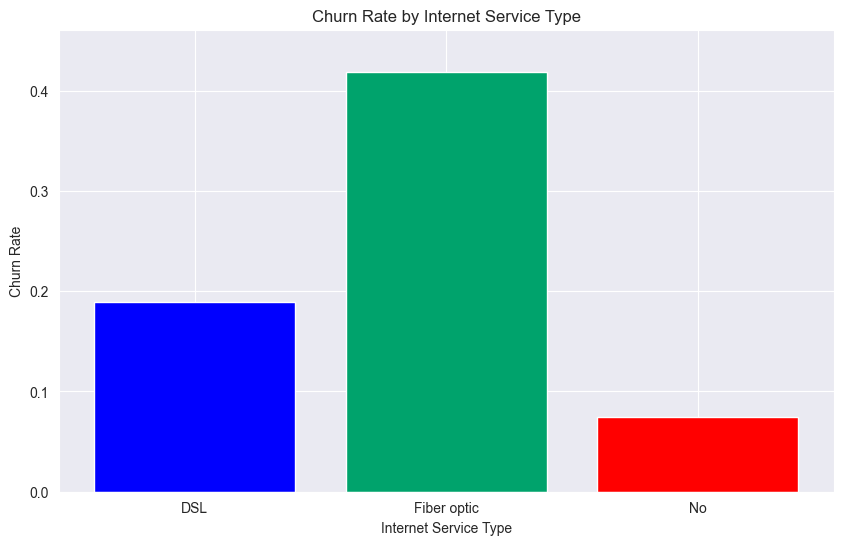

In [10]:
# Grouping the data by InternetService and Churn columns
internet_churn = df_churn.groupby(['InternetService', 'Churn']).size().unstack()

# Calculate churn rate
internet_churn['Churn Rate'] = internet_churn['Yes'] / (internet_churn['Yes'] + internet_churn['No'])


# Reset index for better graph labeling
internet_churn.reset_index(inplace=True)

# Plotting the Churn Rate by Internet Service Type
plt.figure(figsize=(10, 6))
plt.bar(internet_churn['InternetService'], internet_churn['Churn Rate'], color=['blue', '#00A36C', '#FF0000'])
plt.xlabel('Internet Service Type')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Internet Service Type')
plt.xticks(internet_churn['InternetService'])
plt.ylim(0, max(internet_churn['Churn Rate'])*1.1)  # Increase y-axis limit for better visibility
plt.show()

**_Fifth Insight (Part 2): Internet Service Type by Senior Citizen_**

We decided to create this chart to understand the preferences and/or the availability of internet services to Senior Citizens within the dataset. 
An initial insight of this can be that a higher count for Fiber optic could indicate a preference for high-speed internet among Senior Citizens, or it might reflect the market availability of different types of services.

- X-axis (Internet Service Type): There are three categories of internet service represented—Fiber optic, DSL, and No (indicating no internet service). Same as the previous graph.

- Y-axis (Count): The number of Senior Citizens subscribed to each type of internet service.

Bars: Each bar's height corresponds to the count of Senior Citizens with that particular type of internet service.

Interpreting the graph and insights:

- The tall blue bar for Fiber optic indicates that this is the most popular type of internet service among Senior Citizens in the dataset, with a count reaching close to 800.

- The medium-height blue bar for DSL shows a moderate number of Senior Citizens using this service, around 200.

- The short blue bar for No internet service shows that a relatively small number of Senior Citizens do not subscribe to internet service at all.

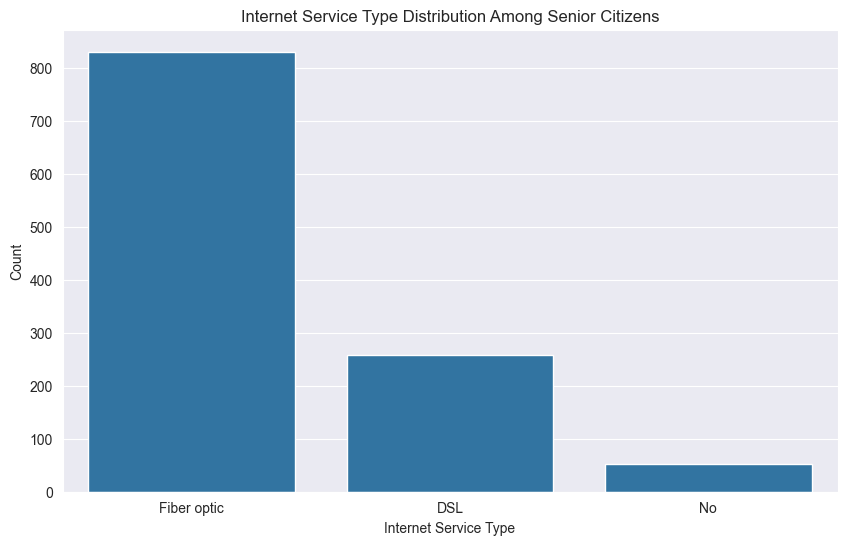

In [11]:
# Filtering the dataset for Senior Citizens
senior_citizens = df_churn[df_churn['SeniorCitizen'] == 1]

# Creating a count plot for Internet Service Types among Senior Citizens
plt.figure(figsize=(10, 6))
internet_service_count = sns.countplot(data=senior_citizens, x='InternetService', order = senior_citizens['InternetService'].value_counts().index)
plt.title('Internet Service Type Distribution Among Senior Citizens')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.show()